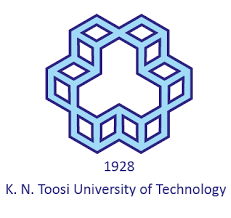
# ***LiDar Assignment 02: PointCloud Un-supervised classification (clustering)***

**KNTU G.E engineering faculty _ 2023 November**

*Hasti Rafiei Nia* 

*Student Number : 9926683*


Importing Libraries.

In [32]:
import os
import laspy
import numpy as np
import open3d as o3d
import matplotlib as mpl
from collections import Counter
from sklearn.cluster import KMeans
mpl.rc('font', family ='Times New Roman')
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

Change directory & read point cloud(pc) data

In [20]:
os.chdir('D:/')
las = laspy.read('nonground_training.Las')

Convert las to numpy array format.

In [21]:
pc = np.vstack([las.X, las.Y, las.Z]).transpose()
print(pc.shape)

(511627, 3)


3D Point cloud visualization.

In [22]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pc)
o3d.visualization.draw_geometries([pcd])

Geting the information.

In [23]:
list(las.point_format. dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue']

Computing normal vectors.

In [24]:
pcd.estimate_normals(search_param = o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn = 30))
o3d.visualization.draw_geometries([pcd], point_show_normal = True)

Feature extraction.

In [25]:
intensity = las.intensity
intensity

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [26]:
G = las.green; B=las.blue
Ind = ((B-G)/(B+G))
ef = las.edge_of_flight_line
sl = las.scan_direction_flag

Creation Data(feature) frame & preprocessing

In [27]:
features = np.stack([las.Z, Ind]).transpose()
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Clustering & visualization with KMeans.

In [39]:
clustering = KMeans(n_clusters=4, max_iter=800, random_state=0).fit(features)
clustered_KM = clustering.labels_
Counter(clustered_KM)

clustered_pc_KM = np.vstack([las.X, las.Y, clustered_KM]).transpose()
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(clustered_pc_KM)
o3d.visualization.draw_geometries([geom])

Exporting results

In [35]:
output = laspy.create(point_format = las.header.point_format)
output.X = las.X
output.Y = las.Y
output.Z = las.Z
output.classification = clustered_pc_KM[:,2]
out_name = 'unsupervised_KM.Las'
output.write(out_name)

Clustering & visualization with GMM.

In [40]:
gmm = GaussianMixture(n_components=4).fit(features)
clustered_GMM = gmm.predict(features)
Counter(clustered_GMM)

clustered_pc_GMM = np.vstack([las.X, las.Y, clustered_GMM]).transpose()
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(clustered_pc_GMM)
o3d.visualization.draw_geometries([geom])

Exporting results.

In [37]:
output = laspy.create(point_format = las.header.point_format)
output.X = las.X
output.Y = las.Y
output.Z = las.Z
output.classification = clustered_pc_GMM[:,2]
out_name = 'unsupervised_KM.Las'
output.write(out_name)